In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

In [8]:
ls

 Volume in drive C has no label.
 Volume Serial Number is 4E43-7E1D

 Directory of C:\Users\User\Desktop\assignment\assignment

19/10/2024  20:19    <DIR>          .
19/10/2024  20:19    <DIR>          ..
18/10/2024  21:26    <DIR>          .ipynb_checkpoints
19/10/2024  20:18            55.928 assignment.ipynb
17/10/2024  21:06         4.249.523 Business Data Analyst_Data Set.xlsx
               2 File(s)      4.305.451 bytes
               3 Dir(s)  151.208.009.728 bytes free


In [9]:
excel_file_path = 'Business Data Analyst_Data Set.xlsx'
dfs = pd.read_excel(excel_file_path, sheet_name=['Description', 'Main data', 'Geographic Mapping'])

In [10]:
df_description = dfs['Description']
df_main = dfs['Main data']
df_geo = dfs['Geographic Mapping']

In [11]:
df_description

,Field,Description
0,week,Week number
1,Hotel_ID,Unique hotel ID
2,device,Type of device from which ad was clicked
3,Clicks,Number of times our google adwords ad was clic...
4,Bookings,Numbers of times the click converted to a booking
5,Avgerage Booking,Average booking value of the bookings (null if...
6,Cost,Cost paid to google for clicks received
7,Revenue,Comission received from bookings made
8,Click value,Revenue/Clicks
9,CPC,Cost per click: Cost/Clicks


In [12]:
df_main.head()

,Week,Hotel_ID,Device,Clicks,Bookings,Average Booking,Revenue,Cost,Click Value,CPC
0,2024/08,1040844.0,Desktop,1,0,NaN,0.0,0.5,0.0,0.46
1,2024/08,1040971.0,Desktop,1,0,NaN,0.0,0.4,0.0,0.42
2,2024/08,1040980.0,Desktop,1,0,NaN,0.0,0.5,0.0,0.51
3,2024/08,1041114.0,Tablet,1,0,NaN,0.0,0.3,0.0,0.28
4,2024/08,1041115.0,Desktop,1,0,NaN,0.0,0.2,0.0,0.20


In [18]:
df_geo.head()

,Hotel_ID,Country,Region,Super Region
0,1046352,Andorra,SouthernEurope,WestEurope
1,1046355,Andorra,SouthernEurope,WestEurope
2,1046356,Andorra,SouthernEurope,WestEurope
3,1046357,Andorra,SouthernEurope,WestEurope
4,1054963,Andorra,SouthernEurope,WestEurope


In [19]:
df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101639 entries, 0 to 101638
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Week             101639 non-null  object 
 1   Hotel_ID         101577 non-null  float64
 2   Device           101639 non-null  object 
 3   Clicks           101639 non-null  int64  
 4   Bookings         101639 non-null  int64  
 5   Average Booking  1991 non-null    float64
 6   Revenue          101639 non-null  float64
 7   Cost             101639 non-null  float64
 8   Click Value      101639 non-null  float64
 9   CPC              101639 non-null  float64
dtypes: float64(6), int64(2), object(2)
memory usage: 7.8+ MB


In [16]:
df_main_clean = df_main[df_main['Hotel_ID'].notnull()]

In [17]:
df_main_clean['Hotel_ID'] = df_main_clean['Hotel_ID'].astype(int)

C:\Users\User\AppData\Local\Temp\ipykernel_8084\306927212.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_main_clean['Hotel_ID'] = df_main_clean['Hotel_ID'].astype(int)


In [20]:
DataBase = pd.merge(df_main_clean, df_geo, on = 'Hotel_ID', how = 'left')

In [21]:
DataBase

,Week,Hotel_ID,Device,Clicks,Bookings,Average Booking,Revenue,Cost,Click Value,CPC,Country,Region,Super Region
0,2024/08,1040844,Desktop,1,0,NaN,0.0,0.5,0.0,0.46,Germany,WesternEurope,WestEurope
1,2024/08,1040971,Desktop,1,0,NaN,0.0,0.4,0.0,0.42,Egypt,NorthAfrica,MENA
2,2024/08,1040980,Desktop,1,0,NaN,0.0,0.5,0.0,0.51,Mexico,Mexico,CAC
3,2024/08,1041114,Tablet,1,0,NaN,0.0,0.3,0.0,0.28,Morocco,NorthAfrica,MENA
4,2024/08,1041115,Desktop,1,0,NaN,0.0,0.2,0.0,0.20,Morocco,NorthAfrica,MENA
...,...,...,...,...,...,...,...,...,...,...,...,...,...
101572,2023/36,1880073,Desktop,1,0,NaN,0.0,0.2,0.0,0.16,Morocco,NorthAfrica,MENA
101573,2023/36,1881750,Tablet,1,0,NaN,0.0,0.2,0.0,0.19,Morocco,NorthAfrica,MENA
101574,2023/36,1887994,Desktop,1,0,NaN,0.0,0.3,0.0,0.29,Morocco,NorthAfrica,MENA
101575,2023/36,1888804,Desktop,1,0,NaN,0.0,0.3,0.0,0.27,Vietnam,SoutheastAsia,Asia


In [162]:
DataBase.to_csv('database.csv', index = False)

In [1]:
###################
###Hotel Dataset###
###################

In [90]:
hotel = DataBase.groupby(by = 'Hotel_ID', as_index=False)[['Bookings','Clicks','Revenue','Cost']].sum()

In [91]:
hotel['conversion_rate'] = hotel['Bookings'] / hotel['Clicks']
hotel['return_on_adv_spent'] = hotel['Revenue'] / hotel['Cost']

In [92]:
hotel

,Hotel_ID,Bookings,Clicks,Revenue,Cost,conversion_rate,return_on_adv_spent
0,1040818,0,1,0.0,0.2,0.0,0.0
1,1040823,0,3,0.0,1.1,0.0,0.0
2,1040838,0,4,0.0,1.7,0.0,0.0
3,1040840,0,7,0.0,3.4,0.0,0.0
4,1040844,0,17,0.0,6.8,0.0,0.0
...,...,...,...,...,...,...,...
18838,1887933,0,4,0.0,0.7,0.0,0.0
18839,1887994,0,7,0.0,2.4,0.0,0.0
18840,1888127,0,14,0.0,3.9,0.0,0.0
18841,1888232,0,2,0.0,0.4,0.0,0.0


In [ ]:
##################################
#####underperforming hotels#######
##################################

In [93]:
hotel[hotel.conversion_rate == 0]

,Hotel_ID,Bookings,Clicks,Revenue,Cost,conversion_rate,return_on_adv_spent
0,1040818,0,1,0.0,0.2,0.0,0.0
1,1040823,0,3,0.0,1.1,0.0,0.0
2,1040838,0,4,0.0,1.7,0.0,0.0
3,1040840,0,7,0.0,3.4,0.0,0.0
4,1040844,0,17,0.0,6.8,0.0,0.0
...,...,...,...,...,...,...,...
18838,1887933,0,4,0.0,0.7,0.0,0.0
18839,1887994,0,7,0.0,2.4,0.0,0.0
18840,1888127,0,14,0.0,3.9,0.0,0.0
18841,1888232,0,2,0.0,0.4,0.0,0.0


In [94]:
hotel['click_buckets'] = np.floor(hotel['Clicks'] / 10) * 10

In [95]:
hotel[hotel.conversion_rate == 0].groupby(by = 'click_buckets')[['Hotel_ID']].count()

,Hotel_ID
click_buckets,
0.0,14661
10.0,1584
20.0,505
30.0,206
40.0,115
50.0,75
60.0,46
70.0,31
80.0,18


In [96]:
underperforming_hotels = list(hotel['Hotel_ID'][(hotel['conversion_rate'] == 0) & (hotel['Clicks'] >= 10)])

In [98]:
under_perform_df = DataBase[DataBase['Hotel_ID'].isin(underperforming_hotels)]

In [99]:
under_perform_df['hotel_cost'] = under_perform_df['Clicks']*under_perform_df['CPC']

C:\Users\User\AppData\Local\Temp\ipykernel_4440\1593522021.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  under_perform_df['hotel_cost'] = under_perform_df['Clicks']*under_perform_df['CPC']


In [101]:
under_perform_df['hotel_cost'].sum()

27834.899999999998

In [137]:
###############################
######converting hotels########
###############################

In [105]:
converting_hotels = hotel[hotel.conversion_rate > 0]

In [132]:
converting_hotels = converting_hotels[converting_hotels['Cost'] > 0.0]

In [129]:
median_cr = converting_hotels['conversion_rate'].median()
mean_cr = converting_hotels['conversion_rate'].mean()
std_cr = converting_hotels['conversion_rate'].std()
print(median_cr, mean_cr)

0.07692307692307693 0.17784833711541032


In [130]:
median_roas = converting_hotels['return_on_adv_spent'].median()
mean_roas = converting_hotels['return_on_adv_spent'].mean()
std_roas = converting_hotels['return_on_adv_spent'].std()
mean_roas

14.592460108819282

In [147]:
 len(converting_hotels[
    (converting_hotels['conversion_rate'] >= mean_cr) & 
    (converting_hotels['Bookings'] > 1)
].sort_values(by='Bookings', ascending=False))

47

In [160]:
converting_hotels[
    (converting_hotels['conversion_rate'] <= mean_cr)
].sort_values(by='return_on_adv_spent', ascending= True).head(10)

,Hotel_ID,Bookings,Clicks,Revenue,Cost,conversion_rate,return_on_adv_spent,click_buckets
3150,1073901,1,197,2.7,93.0,0.005076,0.029032,190.0
1138,1050750,1,682,11.1,161.3,0.001466,0.068816,680.0
57,1041311,1,194,4.9,67.0,0.005155,0.073134,190.0
14425,1618655,1,56,2.4,32.0,0.017857,0.075000,50.0
3202,1073996,1,79,4.2,47.9,0.012658,0.087683,70.0
6175,1198846,1,395,25.0,284.9,0.002532,0.087750,390.0
15973,1670233,1,160,9.7,106.1,0.006250,0.091423,160.0
13179,1545607,1,64,3.3,34.6,0.015625,0.095376,60.0
14766,1629186,1,116,5.4,53.5,0.008621,0.100935,110.0
7029,1214832,1,35,1.3,11.1,0.028571,0.117117,30.0


In [2]:
##########################
#####Countries############
#########################

In [ ]:
countries = DataBase.groupby(by = 'Country', as_index=False)[['Bookings','Clicks','Revenue','Cost']].sum()

In [27]:
countries['conversion_rate'] = countries['Bookings'] / countries['Clicks']
countries['return_on_adv_spent'] = countries['Revenue'] / countries['Cost']

In [37]:
np.sum(countries.conversion_rate == 0)

32

In [34]:
countries[countries['Bookings']==0].sort_values(by = 'Cost', ascending = False).head(7).sum()

Country                VietnamSaudi ArabiaCosta RicaMaltaHong KongNew...
Bookings                                                               0
Clicks                                                               987
Revenue                                                              0.0
Cost                                                               352.5
conversion_rate                                                      0.0
return_on_adv_spent                                                  0.0
dtype: object

In [50]:
##########################
###### Device############
#########################

In [54]:
device = DataBase.groupby(by = 'Device', as_index=False)[['Bookings','Clicks','Revenue','Cost']].sum()

In [55]:
device

,Device,Bookings,Clicks,Revenue,Cost
0,Desktop,1644,113550,51482.6,49912.5
1,Mobile,120,14274,3537.5,3082.8
2,Tablet,352,36818,12703.4,14914.9


In [56]:
device['conversion_rate'] = device['Bookings'] / device['Clicks']
device['return_on_adv_spent'] = device['Revenue'] / device['Cost']

In [57]:
device

,Device,Bookings,Clicks,Revenue,Cost,conversion_rate,return_on_adv_spent
0,Desktop,1644,113550,51482.6,49912.5,0.014478,1.031457
1,Mobile,120,14274,3537.5,3082.8,0.008407,1.147496
2,Tablet,352,36818,12703.4,14914.9,0.009561,0.851725


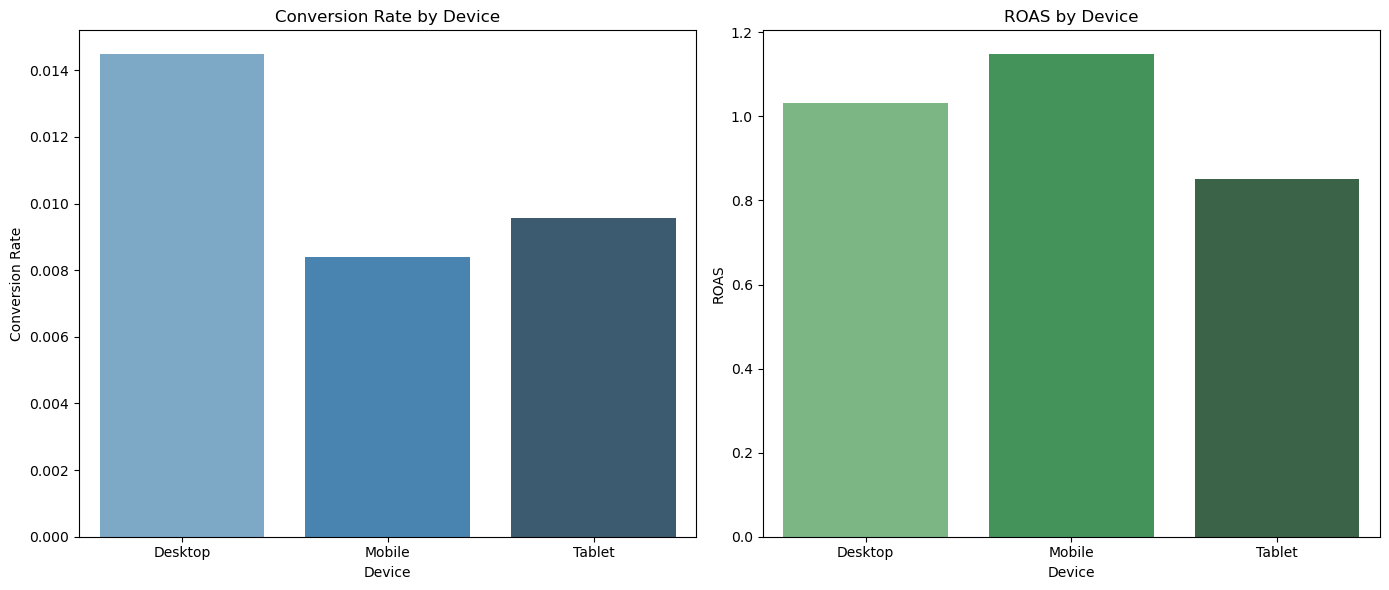

In [68]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

sns.barplot(
    x='Device',
    y='conversion_rate',
    data=device,
    ax=axes[0],
    palette='Blues_d'
)
axes[0].set_title('Conversion Rate by Device')
axes[0].set_xlabel('Device')
axes[0].set_ylabel('Conversion Rate')

sns.barplot(
    x='Device',
    y='return_on_adv_spent',
    data=device,
    ax=axes[1],
    palette='Greens_d'
)
axes[1].set_title('ROAS by Device')
axes[1].set_xlabel('Device')
axes[1].set_ylabel('ROAS')

plt.tight_layout()
plt.show()